# First model (paper: flower classification via CNN) 

In [1]:
#!pip install split-folders

In [2]:
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, AveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from pathlib import Path
from tensorflow import keras
from livelossplot.inputs.keras import PlotLossesCallback
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pickle


In [3]:
batch_size = 2
train= tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.2, 
                                                       zoom_range=0.2, 
                                                       )

#train= tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.2, rotation_range=90, 
#                                                     width_shift_range=0.5, 
#                                                     height_shift_range=0.5,
#                                                     zoom_range=0.2,
 #                                                    horizontal_flip=True, 
#                                                     vertical_flip=True,
#                                                     preprocessing_function=preprocess_input)


test= tf.keras.preprocessing.image.ImageDataGenerator()

# work on train dataset

In [4]:
traingen = train.flow_from_directory(directory="train",
                                        target_size=(224,224), 
                                        class_mode='categorical',
                                        #shuffle= True,
                                        )

Found 6005 images belonging to 102 classes.


In [5]:
validgen = test.flow_from_directory(directory="val", 
                                   target_size=(224,224), 
                                   class_mode='categorical',
                                    #shuffle= True,
                                    )

Found 1019 images belonging to 102 classes.


In [6]:
pic = load_img("image_00070.jpg")
pic_array = img_to_array(pic)
pic_array = pic_array.reshape((1, )+ pic_array.shape)
pic_array.shape

(1, 500, 667, 3)

In [7]:
kernel_regularizer1 = tf.keras.regularizers.l1(0.01)
activity_regularizer2 = tf.keras.regularizers.l2(0.01)

In [8]:
input_shape = (224, 224, 3)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(64, 5 , padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
    
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
    
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3)),
    
  layers.Conv2D(512, 3, padding='same', activation='relu'), 
  #layers.Conv2D(512, 3, padding='same', activation='relu'),   
  layers.MaxPooling2D(pool_size=(3, 3)),
    
    
  
  layers.Flatten(),
  layers.Dense(4096, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(102)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0

In [10]:
optim_1 = Adam(learning_rate=0.0001, decay=0.0001/100)
n_classes=102

n_steps = len(traingen)//batch_size
n_val_steps = len(validgen)//batch_size
n_epochs = 50


In [11]:
plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='Custome.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor=optim_1,
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

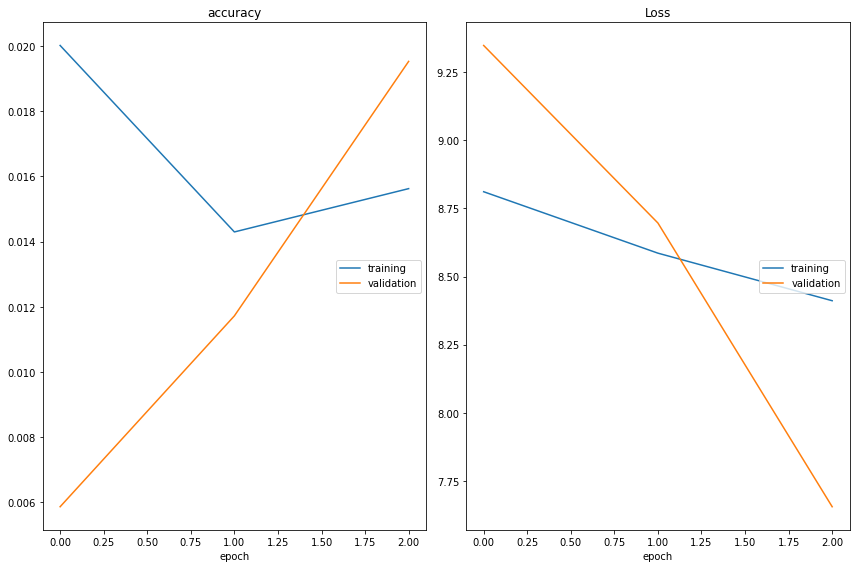

accuracy
	training         	 (min:    0.014, max:    0.020, cur:    0.016)
	validation       	 (min:    0.006, max:    0.020, cur:    0.020)
Loss
	training         	 (min:    8.411, max:    8.811, cur:    8.411)
	validation       	 (min:    7.655, max:    9.348, cur:    7.655)
94/94 [==============================] - 50s 536ms/step - loss: 8.4112 - accuracy: 0.0156 - val_loss: 7.6554 - val_accuracy: 0.0195
Epoch 4/50
 9/94 [=>............................] - ETA: 1:45 - loss: 8.0315 - accuracy: 0.0243

In [ ]:
epochs=20
history = model.fit(traingen,
                    epochs=n_epochs,
                    validation_data=validgen,
                    steps_per_epoch=n_steps,
                    validation_steps=n_val_steps,
                    callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                    )

# testing + evaluation

In [ ]:
dataset_test ="test"
test_dir = pathlib.Path(dataset_test)

In [ ]:
data1_image = list(test_dir.glob('*/*.jpg'))
image1_count = len(data1_image)
print(image1_count)

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
results = model.evaluate(test_ds, batch_size = 90)

In [ ]:
results

In [ ]:
test_data_image = list(test_dir.glob('*/*.jpg'))

# predict
x = []
for img_path in test_data_image:
    img = keras.preprocessing.image.load_img( img_path, target_size=(img_height, img_width) )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array)
    score = tf.nn.softmax(prediction[0])
    print(class_names[np.argmax(score)], " with ", 100 * np.max(score))
    x.append(score)

# VISUAL

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

What did you implement ?



What are the model features ? Architecture ? Parameters ? 

What is the dataset ?

What is the performance ?

What are the problems ?

How will you fix them ?
